<a href="https://colab.research.google.com/github/project4sharing/exp_credit_card_fraud/blob/initial/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Topic - High Level Exercise Goal
This project is a Credit Card Fraud experiment leveraging credit card transaction data to train a classification model that will predict if unseen transaction data will be a fraudulent transacation or not.  

Although different types of electronic payment methods have evolved over time, credit card payment method still takes on a significant portion of all the payment volume.  Because of this, credit card fraud detection is still very much relevant to payment processor and potential (predicted) fraudulent charge could be stopped or confirmed by the card holder (transaction held until card holder confirms purchase).  This is a very common scenario that a lot of us may have experienced and that's also the reason why I choose this data source for my learning journey.

The objective of this ML exercise is to:  
1. Train a surpervised learning classification model (learning from labelled data)
2. Determine if future "unseen" credit card transaction is "potentially" fradulent
3.  Exercise "muscle memory" of common Machine Learning (ML) best practice:
*   Data wangling & cleaning
*   Exploratory data analysis (EDA)
*   Feature treatments
*   Model performance and selection
*   Presentation of discovery




# Data - Data Sources
Credit Card Fraud data source hosted in Kaggle contributed by Dhanush NaraYanan R.

https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data

This data source is licensed under "CC0: Publich Domain".

Data source is a single ~76Mb data file and containes 1MM samples of 8 features:
1. distance_from_home - numberic - Distance from credit card registration address
2. distance_from_last_transaction - numeric - Distance of the current transation from the previous transaction on the same credit card
3. ratio_to_median_purchase_price - numeric - Ratio of current charge to median purchase price
4. repeat_retailer - categorical - current charge made to frequent store / retailer
5. used_chip - categorical - IC chip used to authorize charge
6. used_pin_number - categorical - PIN used to authorize charge
7. online_order - categorical - current charge made for online purchase
8. fraud - categorical - prediction of whether charge may be fraudulent - this is the target variable that we would like to predict

At a first glance, the initial intuition is feature #1, #2, #5, #6 are "card present" type of purchases, ie, card holder makes purchase in person.

Note: To make this notebook more self-contained (and tried to avoid storing my Kaggle API key for download in the notebook -- a bad practice), I copied the data to my Google drive.

# Acquire Additional Packages
Acquire additional Python packages that may not be readily available in the Jupyter notebook environment (in this case Google Colab)

Packages list:


*   gdown - Used to download credit card transacation data stored in Google drive (card-transdata.csv)



In [1]:
# Acquire prerequisite packages
!pip install gdown

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

import gdown

In [3]:
gdown.download('https://drive.google.com/uc?id=1cq3EBN238kBUW4R0u4rDYlyv9HqvqsDo', 'card_transdata.csv')

Downloading...
From: https://drive.google.com/uc?id=1cq3EBN238kBUW4R0u4rDYlyv9HqvqsDo
To: /content/card_transdata.csv
100%|██████████| 76.3M/76.3M [00:01<00:00, 43.0MB/s]


'card_transdata.csv'

Load raw data file into a dataframe

In [4]:
df_credit_card_fraud_org = pd.read_csv('./card_transdata.csv', sep=',', header=0, index_col=False, engine='python')

Use df.info() to learn:
1. Shape of dataframe
2. Data type of each feature & label
3. Any missing data data

In [5]:
df_credit_card_fraud_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Use df.describe() to learn unusual charasteristics hidden in the data:
1. Any anonmalies / outliers
2. Imbalance data set
3. Contradiction in data

In [11]:
df_credit_card_fraud_org.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.9, 0.93, 0.95, 0.99])

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
90%,60.268980,10.008053,4.080939,1.000000,1.000000,1.000000,1.000000,0.000000
93%,78.908923,14.146703,5.050214,1.000000,1.000000,1.000000,1.000000,1.000000
95%,99.708638,19.170549,6.071425,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning - Check for imbalance data

Valid tx count:912597, Fraudulent tx count: 87403


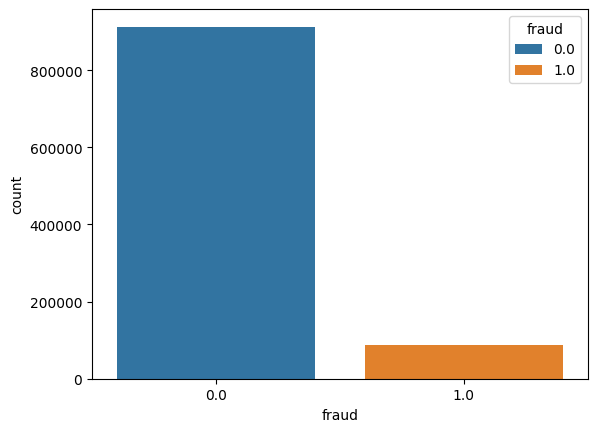

In [24]:
fraud_count = df_credit_card_fraud_org["fraud"].value_counts().tolist()
print(f"Valid tx count:{fraud_count[0]}, Fraudulent tx count: {fraud_count[1]}")

sns.countplot(x = 'fraud', data = df_credit_card_fraud_org, hue='fraud', stat='count', legend='auto')
plt.show()

# Data Cleaning - Fix imbalance data

As the previous diagram confirms our observation from df.describe() and common intuition, the data is imbalance.  With fraudulent ratio around ~9.578%, even without a model, we will be able to guess >90% that a transaction isn't fraudulent.

To fix it, we can either choose under-sampling or over-sampling.  However, since the majority of the dataset are "valid" transactions, if we take the under-sampling route, it will significantly lower the overall data population size and it can potentially drop useful data too, so I decide to take the over-sampling route.





# Basic Data Understanding

*   From DF.info() & describe(), I acquire some basic understanding of the data:
  *   the data set shape is a 100k x 8 tabular data, all features are of numeric type and there is **no missing data** based on the reported number of occurence of all the attributes including the fraud label
  *   all of the features are already numeric, even the categorical features like: a) used_chip; b) used_pin_number; c) online_order; d) repeat_retailer and ***they are all of binary type of categorical feature, ie, True / False; therefore, there is NO need to further apply feature encoding techniques, like one-hot encoder, to encode them***
  
  




# **Exploratory Data Analysis - High Level "To-Do"s**

Perform the following tasks to further data understanding:


1.   Feature Distribution Analysis - this step demonstrate the distrubtion of the data values so as to determine if there are any data value anomalies that require special treatment
2.   Correlation Analysis - this step determines the relationships among the various features so as to determin if there is/are irrelevant features which introduces noise and negatively impact model performance and should be dropped





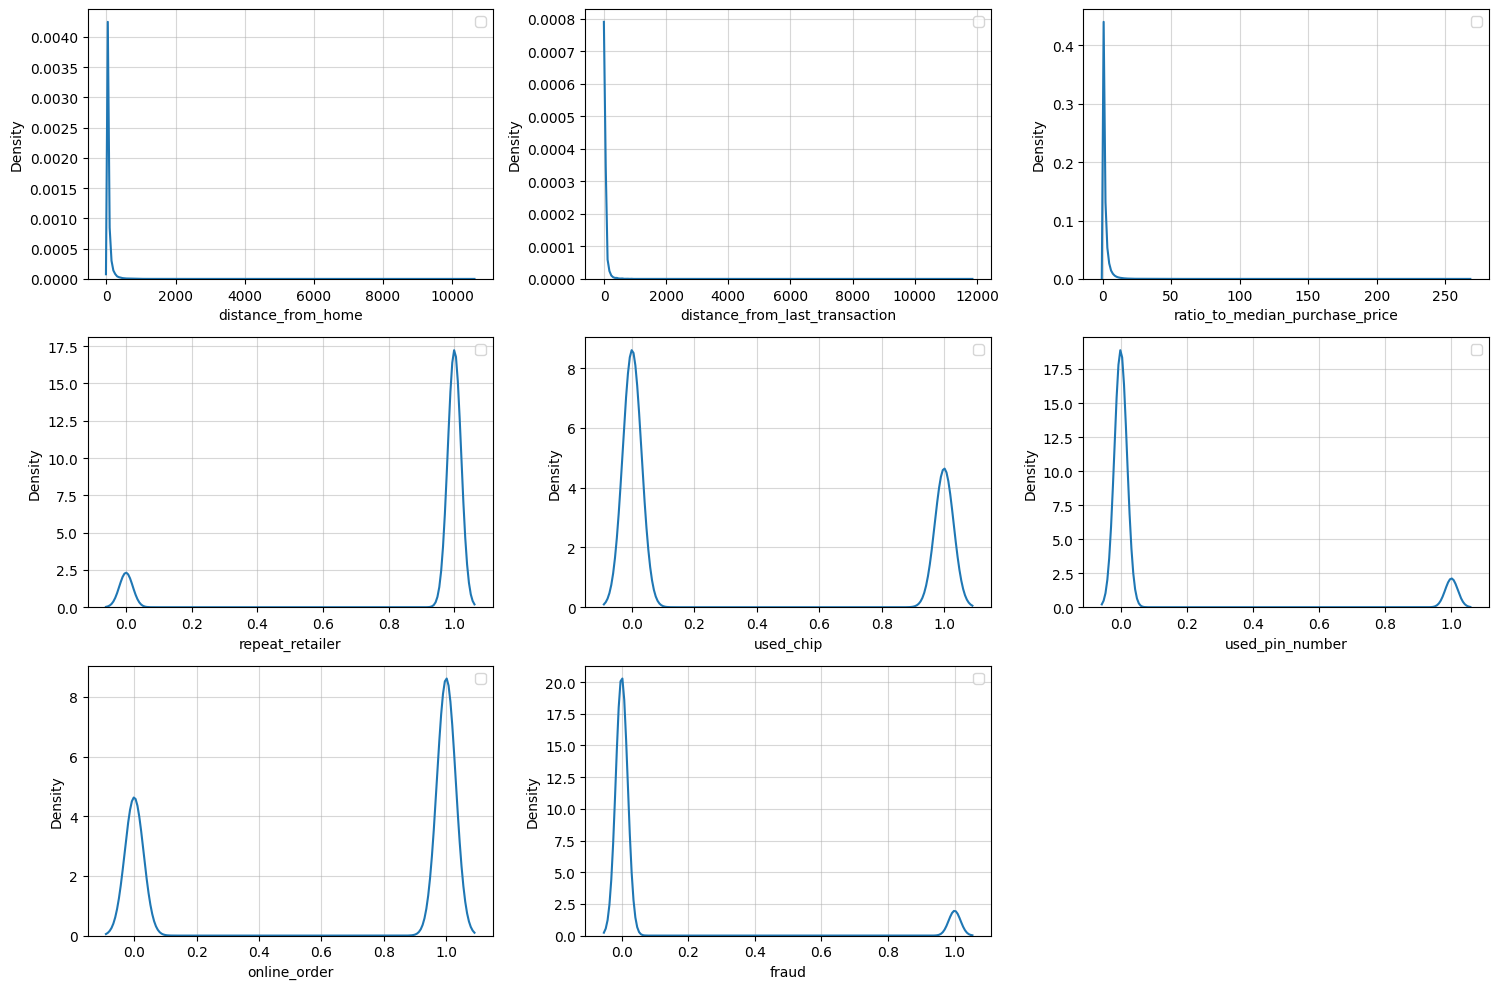

In [ ]:
fig = plt.figure(figsize=(15, 10))
rows, cols = 3, 3
for i, col_name in enumerate(df_credit_card_fraud_org.loc[:, 'distance_from_home' : 'fraud'].columns):
  # print(f"{i}, {col_name}")
  ax = fig.add_subplot(rows, cols, i+1)
  ax.grid(alpha=0.5, axis='both')
  sns.kdeplot(x = col_name, data = df_credit_card_fraud_org)
  ax.set_xlabel(col_name)
  ax.legend()

fig.tight_layout()
fig.show()

In [ ]:
df_credit_card_fraud_org.describe(include='all', percentiles=[.9, .95, .99])

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
90%,60.268980,10.008053,4.080939,1.000000,1.000000,1.000000,1.000000,0.000000
95%,99.708638,19.170549,6.071425,1.000000,1.000000,1.000000,1.000000,1.000000
99%,259.943898,65.725606,12.794086,1.000000,1.000000,1.000000,1.000000,1.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_credit_card_fraud_org[df_credit_card_fraud_org['online_order'] == 1.0].describe(include='all', percentiles=[0.25, 0.5, 0.75, .9, .95, .99])

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,650552.000000,650552.000000,650552.000000,650552.000000,650552.000000,650552.000000,650552.0,650552.00000
mean,26.566435,5.039188,1.823505,0.881410,0.350322,0.100544,1.0,0.12714
std,65.040899,26.915736,2.796166,0.323306,0.477071,0.300724,0.0,0.33313
min,0.004874,0.000319,0.004399,0.000000,0.000000,0.000000,1.0,0.00000
25%,3.877650,0.296006,0.475435,1.000000,0.000000,0.000000,1.0,0.00000
50%,9.948229,0.995626,0.997604,1.000000,0.000000,0.000000,1.0,0.00000
75%,25.678092,3.353511,2.095678,1.000000,1.000000,0.000000,1.0,0.00000
90%,60.147304,10.034036,4.077365,1.000000,1.000000,1.000000,1.0,1.00000
95%,99.678799,19.223842,6.070441,1.000000,1.000000,1.000000,1.0,1.00000
99%,258.969301,65.704025,12.804486,1.000000,1.000000,1.000000,1.0,1.00000


In [ ]:
df_credit_card_fraud_org[df_credit_card_fraud_org['fraud'] == 1.0].describe(include='all', percentiles=[0.25, 0.5, 0.75, .9, .95, .99])

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
90%,179.713913,25.925987,11.222514,1.000000,1.000000,0.000000,1.000000,1.0
95%,260.531614,69.657198,14.919440,1.000000,1.000000,0.000000,1.000000,1.0
99%,554.599050,188.346119,26.485683,1.000000,1.000000,0.000000,1.000000,1.0


# **Exploratory Data Analysis**

Perform the following tasks to further data understanding:


1.   From the diagrams, we observe "long tails" and, in terms of order of magnitude, they are sigifnicant different from the other features, so this indicates that we need to decide proper treatment like normalization of the features values as algorithm like Logistical Regression is sensitive to the scale of the features


*   distance_from_home
*   distance_from_last_transaction
*   ratio_to_median_purchase_price


2.  The other features are all categorical of True / False, and from the diagrams, we may need to handle this "imbalance" characteristic of the features




# Data Cleaning - Fixing missing data

# Data Cleaning - Features normalization

# Data Cleaning - Due to imbalance of data, Over-sampling / Under-sampling

# Data Cleaning - Fixing "Doubtful" data - Online order but chip present



# Data Cleaning - Check for correlation among features


<Axes: >

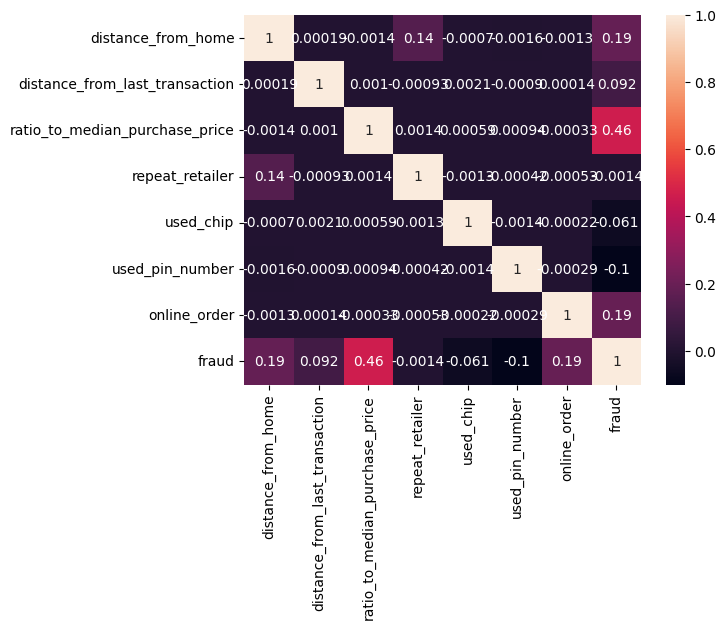

In [ ]:
corr_matrix = df_credit_card_fraud_org.corr()
sns.heatmap(corr_matrix, annot=True)